<a href="https://colab.research.google.com/github/DataScienceAndEngineering/deep-learning-final-project-project-sidewalk/blob/nicholas/notebooks/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Loading all necessary packages
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import PIL
import matplotlib.pyplot as plt
import imageio as iio
from skimage.transform import resize
from google.colab import drive, files
drive.mount('/content/drive')

# Check if processed data available
#if not os.path.isdir('./processed_labels/'):
#  !unzip -n ./drive/MyDrive/tensorflow_datasets/downloads/manual/processed_labels.zip
#if not os.path.isdir('./processed_images/'):
#  !unzip -n ./drive/MyDrive/tensorflow_datasets/downloads/manual/processed_images.zip

# Extract the dataset into colab
if not os.path.isdir('./leftImg8bit/'):
  !unzip -n ./drive/MyDrive/tensorflow_datasets/downloads/manual/leftImg8bit_trainvaltest.zip
if not os.path.isdir('./gtFine/'):
  !unzip -n ./drive/MyDrive/tensorflow_datasets/downloads/manual/gtFine_trainvaltest.zip


## Data handling functions

def mask_2_image(path):

  # Converts the mask path string to the image path file corresponding to the same image
  
  parts = path.split('/')
  parts[1] = 'leftImg8bit'
  file_name = parts[-1].split('_')
  file_name[-2] = 'leftImg8bit.png'
  file_name = file_name[0:-1]
  parts[-1] = '_'.join(file_name)
  path = '/'.join(parts)

  return path
  
def extract_files(subset='all', paths='old'):

  # Returns filepaths of all labels and images which include a sidewalk segmentation
  # Additinoally, moves all valid samples into extraction folders

  if not os.path.isdir('./extract_labels/'):
    os.mkdir('./extract_labels/')
    os.mkdir('./extract_images/')
  labels_files = []
  img_files = []
  if subset == 'all':
    subsets = ['train', 'val', 'test']
  else:
    subsets = [subset]
  for group in subsets:
    LabelsDir = f'./gtFine/{group}'
    print(LabelsDir)
    for root, dirs, files_list in os.walk(LabelsDir):
      for filename in files_list:
        if filename.endswith('labelIds.png'):
          f = os.path.join(root, filename)
          labels = np.array(PIL.Image.open(f))
          if 8 in labels:
            os.rename(f, './extract_labels/' + '_'.join(f.split('/')[-1].split('_')[0:3]) + '.png')
            d = mask_2_image(f)
            os.rename(d, './extract_images/' + '_'.join(d.split('/')[-1].split('_')[0:3]) +'.png')
            if paths == 'old':
              labels_files.append(f)
              img_files.append(d)
            elif paths == 'new':
              labels_files.append('./extract_labels/' + '_'.join(f.split('/')[-1].split('_')[0:3]) + '.png')
              img_files.append('./extract_images/' + '_'.join(d.split('/')[-1].split('_')[0:3]) +'.png')
  return labels_files, img_files

def process_images(shape=(256, 512, 3)):
  #Preprocessing of the images, resizing to standard size
  ImageDir = './extract_images/'
  if not os.path.isdir('./processed_images/'):
    os.mkdir('./processed_images/')
  for fil in os.listdir(ImageDir):
    image = iio.imread(ImageDir + fil)
    image = resize(image, shape)
    iio.imsave('./processed_images/' + fil, image)

def process_masks(shape=(256, 512, 1)):
  # Preprocessing of the masks: removes all segmentations except sidewalks
  # REsizes masks to standard size
  LabelDir = './extract_labels/'
  if not os.path.isdir('./processed_labels/'):
    os.mkdir('./processed_labels/')
  for fil in os.listdir(LabelDir):
    mask = iio.imread(LabelDir + fil)
    mask = np.array(mask == 8).astype('uint8')
    mask = resize(mask, shape)
    iio.imsave('./processed_labels/' + fil, mask)

def process_files():
  #Processes all extracted files, zips images and labels, then downloads processed data
  process_images()
  process_masks()
  !zip -r /content/processed_images.zip /content/processed_images
  !zip -r /content/processed_labels.zip /content/processed_labels
  files.download("/content/processed_images.zip")
  files.download("/content/processed_labels.zip")


Streaming output truncated to the last 5000 lines.
  inflating: gtFine/test/berlin/berlin_000117_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000114_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000434_000019_gtFine_labelIds.png  
  inflating: gtFine/test/berlin/berlin_000420_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000483_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000420_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000254_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000490_000019_gtFine_color.png  
  inflating: gtFine/test/berlin/berlin_000448_000019_gtFine_polygons.json  
  inflating: gtFine/test/berlin/berlin_000099_000019_gtFine_labelIds.png  
  inflating: gtFine/test/berlin/berlin_000068_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000288_000019_gtFine_instanceIds.png  
  inflating: gtFine/test/berlin/berlin_000409_00001

In [4]:
#if not has_processed:
extract_files()
process_files()

./gtFine/train
./gtFine/val
./gtFine/test


Streaming output truncated to the last 5000 lines.
<ipython-input-2-5a7dd030cbe5>:84: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask = iio.imread(LabelDir + fil)


Streaming output truncated to the last 5000 lines.
  adding: content/processed_images/strasbourg_000000_017044.png (deflated 0%)
  adding: content/processed_images/erfurt_000053_000019.png (deflated 0%)
  adding: content/processed_images/jena_000033_000019.png (deflated 0%)
  adding: content/processed_images/frankfurt_000001_044525.png (deflated 0%)
  adding: content/processed_images/monchengladbach_000000_001294.png (deflated 0%)
  adding: content/processed_images/munster_000093_000019.png (deflated 0%)
  adding: content/processed_images/strasbourg_000001_006562.png (deflated 0%)
  adding: content/processed_images/hanover_000000_056142.png (deflated 0%)
  adding: content/processed_images/aachen_000015_000019.png (deflated 0%)
  adding: content/processed_images/stuttgart_000094_000019.png (deflated 0%)
  adding: content/processed_images/hanover_000000_045446.png (deflated 0%)
  adding: content/processed_images/hanover_000000_019938.png (deflated 0%)
  adding: content/processed_images/c

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Testing mask_2_image function
f = './gtFine/train/bochum/bochum_000000_023435_gtFine_labelIds.png'
print(f)
print(mask_2_image(f))
print('./extract_labels/' + '_'.join(f.split('/')[-1].split('_')[0:3]) + '.png')

./gtFine/train/bochum/bochum_000000_023435_gtFine_labelIds.png
./leftImg8bit/train/bochum/bochum_000000_023435_leftImg8bit.png
./extract_labels/bochum_000000_023435.png


In [ ]:
#Collect paths to valid files in original directory
train_masks, train_images = extract_files('train')
val_masks, val_images = extract_files('val')
test_masks, test_images = extract_files('test')

# Returns quantity of valid samples for each data grouping
print(f'n_train: {len(train_masks)}')
print(f'n_val: {len(val_masks)}')
print(f'n_test: {len(test_masks)}')


In [ ]:
def dice_coef(y_true, y_pred):
    smooth = 1e-6

    y_true_f = tf.keras.layers.Flatten()(y_true)
    y_pred_f = tf.keras.layers.Flatten()(y_pred)    

    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    denom =(tf.reduce_sum(y_pred_f) + tf.reduce_sum(y_true_f) + smooth)
    return (2. * intersection + smooth) / denom

def dice_score(y_true, y_pred, numLabels=2):
    dice=0
    for index in range(numLabels):
        dice -= dice_coef(y_true[:,:,:,index], y_pred[:,:,:,index])
    return numLabels + dice


In [ ]:
##Input Generator attempt 3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a dataframe with the file paths
#data = {'filename': train_images, 'mask': train_masks}
#df = pd.DataFrame(data)

# Define the ImageDataGenerator for the images
image_generator = ImageDataGenerator()

# Define the ImageDataGenerator for the masks
mask_generator = ImageDataGenerator()

# Use the flow_from_dataframe method to load the images and masks
batch_size = 8
image_height = 256
image_width = 512
image_color_mode = 'rgb' # or 'grayscale'
mask_color_mode = 'grayscale'
seed = 42

image_dir = './extract_images/'
mask_dir = './extract_labels/'

train_generator = image_generator.flow_from_directory(
    image_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    color_mode=image_color_mode,
    seed=seed
)

mask_flow = mask_generator.flow_from_directory(
    mask_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    color_mode=mask_color_mode,
    seed=seed
)

train_generator = zip(train_generator, mask_flow)

# Use the train_generator to fit your model with the fit_generator method

model.fit(
    train_generator,
    epochs=10,
)



Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Epoch 1/10


ValueError: ignored

TypeError: ignored

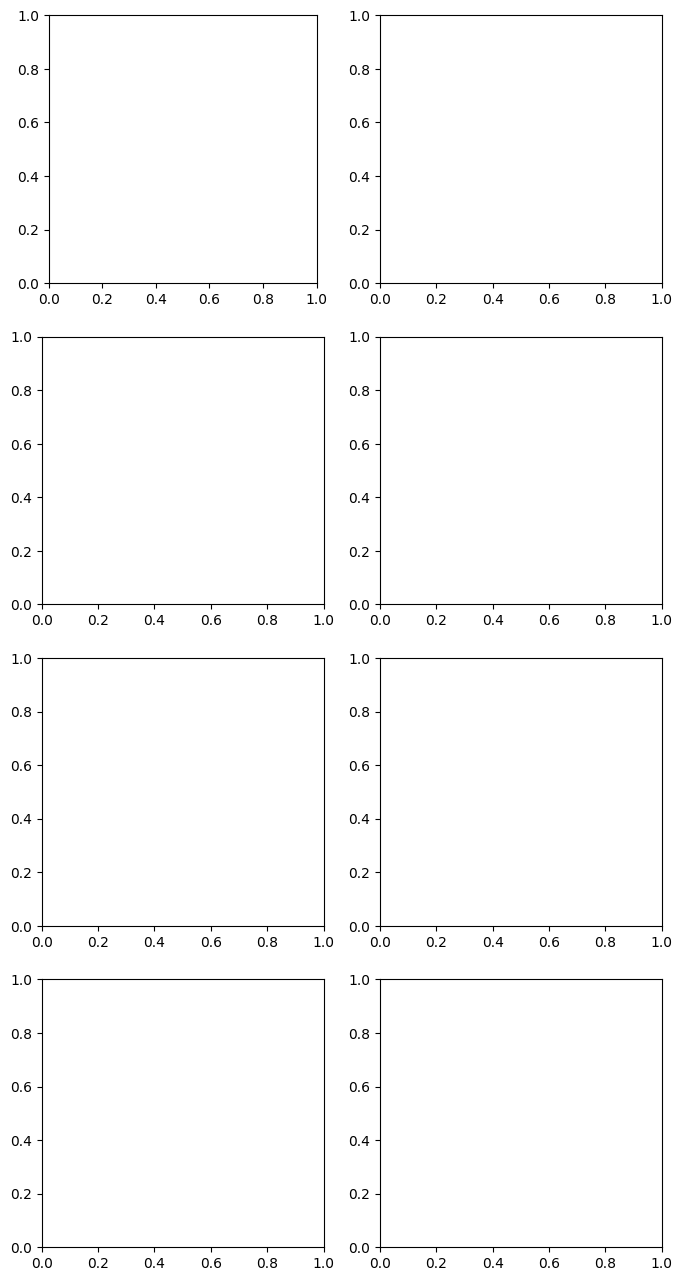

In [ ]:
# Iterate through the generator and display a few samples
for i, (batch_x, batch_y) in enumerate(train_generator):
    # Display the first 4 images and masks in the batch
    if i == 4:
        break
    fig, axs = plt.subplots(4, 2, figsize=(8, 16))
    for j in range(4):
        axs[j, 0].imshow(batch_x[j])
        axs[j, 1].imshow(batch_y[j], cmap='gray')
    plt.show()

In [ ]:
zip(train_generator, mask_flow)

In [ ]:
##Input generator: Not working, .fit() hanging

def mask_processing(mask_path):
    #Removes extra segmentations from mask, returning only sidewalk info.
    #Input path to mask file, returns image (possibly re-save in new directory_)
    mask = tf.io.decode_png(tf.io.read_file(mask_path), channels=1)
    new_mask = tf.cast(tf.math.equal(mask, 8), tf.float32)
    return new_mask

def input_function(image_paths, mask_paths, batch_size):
    images = tf.data.Dataset.from_tensor_slices(image_paths)
    masks = tf.data.Dataset.from_tensor_slices(mask_paths)

    dataset = tf.data.Dataset.zip((images, masks))
    dataset = dataset.shuffle(len(image_paths))

    dataset = dataset.map(lambda x, y: (tf.io.read_file(x), tf.py_function(mask_processing, [y], tf.float32)))
    dataset = dataset.map(lambda x, y: (tf.image.decode_png(x), y))
    dataset = dataset.map(lambda x, y: (tf.image.resize(x, [256, 256]), tf.image.resize(y, [256, 256])))
    dataset = dataset.batch(batch_size)

    dataset = dataset.repeat()
    iterator = iter(dataset)

    while True:
      yield next(iterator)
    #return dataset

input_fn = lambda: input_function(train_images, train_masks, 32)


In [ ]:
# Model architecture

initial=tf.keras.initializers.glorot_uniform(seed=0)

def conv_block(input_layer, n_filters, kernel=(3, 3), padding='same', strides=(1, 1), L2=0):
    layer = tf.keras.layers.Conv2D(n_filters, kernel, padding=padding, strides=strides, kernel_initializer = initial, kernel_regularizer=tf.keras.regularizers.l2(L2))(input_layer)
    layer = tf.keras.layers.BatchNormalization(center=False,scale=False)(layer)
    return tf.keras.layers.Activation('relu')(layer)

def conv_up(n_filters, pool_size=(2,2), kernel_size=(2,2), strides=(2, 2), L2=0):
    return tf.keras.layers.Conv2DTranspose(filters=n_filters, kernel_size=(2,2), kernel_initializer = initial, strides=strides, kernel_regularizer=tf.keras.regularizers.l2(L2))            

    
def gen_model(input_shape =  (256, 512, 3), pool_size=(2, 2),initial_learning_rate=1e-5,
                      depth=4, n_base_filters=16, activation_name="softmax", L2=0, n_classes=2):
        
        inputs = tf.keras.layers.Input(input_shape) #Declare input shape
        levels = list()
        current_layer = tf.keras.layers.Conv2D(n_base_filters, (1, 1), kernel_initializer = initial)(inputs) # initial input layer
        
        """ Down slope portion of U-net"""
        # add levels with max pooling
        for layer_depth in range(depth): #Creats 2 convolutional blocks per depth unit
            layer1 = conv_block(input_layer=current_layer, kernel=(3,3), n_filters=n_base_filters*(layer_depth+1), padding='same', L2=L2)
            layer2 = conv_block(input_layer=layer1, kernel=(3,3), n_filters=n_base_filters*(layer_depth+1), padding='same', L2=L2)
            if layer_depth < depth - 1: #If the current layer is less then the second to last down sampling
                #Apply a pooling layer
                current_layer = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(layer2)
                levels.append([layer1, layer2, current_layer]) #layers are recorded for reference
            else: #If current layer is not less then the second to last, skip the pooling
                current_layer = layer2
                levels.append([layer1, layer2])

        """ Up slope portion of U-net"""
        for layer_depth in range(depth-2, -1, -1): #Going from the last layer up to 0
            
            up_convolution = conv_up(pool_size=(2,2), n_filters=n_base_filters*(layer_depth+2), L2=L2)(current_layer)
            
            concat = tf.keras.layers.concatenate([up_convolution, levels[layer_depth][1]] , axis=-1)
            current_layer = conv_block(n_filters=n_base_filters*(layer_depth+1), kernel=(3,3), input_layer=concat, padding='same', L2=L2)
            current_layer = conv_block(n_filters=n_base_filters*(layer_depth+1), kernel=(3,3), input_layer=current_layer, padding='same', L2=L2)
            
        final_convolution = tf.keras.layers.Conv2D(n_classes, (1, 1), kernel_initializer=initial)(current_layer)
        act = tf.keras.layers.Activation(activation_name)(final_convolution)
        model = tf.keras.Model(inputs=[inputs], outputs=act)
        return model

model = gen_model()
model.compile(loss=dice_coef, optimizer=tf.keras.optimizers.Adam(learning_rate = 0), metrics=['acc'])

In [ ]:
# current hands on input_function(), runtime expires and reboots
model.fit(input_fn=input_function(train_images, train_masks, 2))

TypeError: ignored

In [ ]:
#Ensuring values of 8 correspond to sidewalk segmentations

#cities = ['berlin', 'bielefeld', 'bonn', 'leverkusen', 'mainz', 'munich']
#for i in cities:
i = 'cologne'
tImage = PIL.Image.open(f'./leftImg8bit/train/{i}/{i}_000100_000019_leftImg8bit.png')
tMask = PIL.Image.open(f'./gtFine/train/{i}/{i}_000100_000019_gtFine_labelIds.png')
Mask = np.array(tMask)
Image = np.array(tImage)

#Displaying mask and image pair, printing mask value for sidewalk location
plt.figure()
plt.imshow(Mask)
plt.figure()
plt.imshow(Image)
print(Mask[800,2000])